In [2]:
# from glmhmm import *
import numpy as np
import sys
sys.path.append('/data/users/weixuan/work/model')
print(sys.path)
from fitting import *
from analysis import permute_states

['/data/users/weixuan/work/model/glmhmm', '/home/wliu25/miniconda3/envs/glmhmm/lib/python38.zip', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/lib-dynload', '', '/home/wliu25/.local/lib/python3.8/site-packages', '/data/users/weixuan/work/model/ssm', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages', '/home/wliu25/miniconda3/envs/glmhmm/lib/python3.8/site-packages/setuptools/_vendor', '/data/users/weixuan/work/model']


/home/wliu25/.local/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Testing pipeline: true # of states vs best # states 

In [4]:
N=500
dim_output=2
D = 7

In [5]:
# Given Y, X
val_lls_map = {}
pred_state_map = {}
res_params_map = {}
true_states_seq_map = {}
true_As_map = {}
true_ws_map = {}

states_cands = [1,2,3,4,5]
true_num_states = np.arange(3)+2 #2-4


for true_num_state in true_num_states:
    # Generate X, Y and states
    K = true_num_state
    
    X, Y, true_states_seq, A_true, w_true = gen_true_param(N, K, D, dim_output)
    
    print(f"-----------------------True States {true_num_state}-------------------------")
    val_lls, pred_states_seq, res_params = OptStateCV_traj(Y, \
        model_name = "glmhmm", states_cands=states_cands, \
        inpts=X, num_init=3, obs_dist="gaussian", verbose=False)

    # val_lls: (len(states_cands), n_folds, num_init)  # array to store performance results
    # states = np.zeros((len(states_cands), n_folds, num_init, len(train_trajectories)))
    # res_params[num_states]['ws'], res_params[num_states]["As"], res_params[num_states]["pi0"]

    val_lls_map[true_num_state] = val_lls
    pred_state_map[true_num_state] = pred_states_seq
    res_params_map[true_num_state] = res_params
    true_states_seq_map[true_num_state] = true_states_seq
    true_As_map[true_num_state] = A_true
    true_ws_map[true_num_state] = w_true


-----------------------True States 2-------------------------

CROSS VALIDATION

Use inputs
---------------Number of states: 1---------------
####fold 1####
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
Iter8
Iter9
Train ll -0.8786740749581056
Val ll -0.8967276587422162
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
Iter8
Iter9
Train ll -0.8786740749602012
Val ll -0.8967276639021889
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
Iter8
Iter9
Train ll -0.878674074955448
Val ll -0.8967276619013619
####fold 2####
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
Iter8
Iter9
Train ll -0.8035399273069496
Val ll -1.2831450783734923
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
Iter8
Iter9
Train ll -0.8035399273144436
Val ll -1.2831450128058481
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
Iter8
Iter9
Train ll -0.8035399273092101
Val ll -1.2831450555930346
####fold 3####
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
Iter8
Iter9
Train ll -0.8665195042345459
Val ll -0.9451200959657556
Iter1
Iter2
Iter3
Iter4
Iter5
Iter6
Iter7
It

In [13]:
states_cands = [1,2,3,4,5]
true_num_states = np.array(2)#np.arange(3)+2 #2-4

# val_lls_map[true_num_state] = val_lls
# pred_state_map[true_num_state] = pred_states_seq
# res_params_map[true_num_state] = res_params
# true_states_seq_map[true_num_state] = true_states_seq
# true_As_map[true_num_state] = A_true
# true_ws_map[true_num_state] = w_true

In [16]:
import json
import numpy as np

def to_json_friendly(obj):
    """
    Recursively convert dict/list/np.int64/np.ndarray
    to JSON-friendly types.
    """
    if isinstance(obj, dict):
        # Convert each key to string and each value recursively
        return {str(k): to_json_friendly(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        # Recurse on list items
        return [to_json_friendly(item) for item in obj]
    elif isinstance(obj, np.ndarray):
        # Convert ndarray -> list
        return obj.tolist()
    elif isinstance(obj, (np.int32, np.int64, np.uint32, np.uint64)):
        # Convert NumPy integer -> Python int
        return int(obj)
    # No change otherwise
    return obj


In [17]:
# Save to JSON
import json
output_data = {
    "metadata": {
        "description": "Results of state estimation for various true states.",
        "states_cands": states_cands,
        "true_num_states": true_num_states.tolist(),
        "N": int(N),
        "dim_output": int(dim_output),
        "D": int(D) 
    },
    "val_lls_map": val_lls_map,
    "pred_state_map": pred_state_map,
    "res_params_map": res_params_map,
    "true_states_seq_map": true_states_seq_map,
    "true_As_map": true_As_map,
    "true_ws_map": true_ws_map
}
output_data_json_compatible = to_json_friendly(output_data)

with open("true_vs_pred_numState.json", "w") as json_file:
    json.dump(output_data_json_compatible, json_file, indent=4)

# with open("true_vs_pred_numState.json", "w") as json_file:
#     json.dump(output_data, json_file, indent=4)

In [19]:
# map [true_state]
# val_lls: (len(states_cands), n_folds, num_init)  # array to store performance results
# states = np.zeros((len(states_cands), n_folds, num_init, len(train_trajectories)))
# res_params[num_states]['ws'], res_params[num_states]["As"], res_params[num_states]["pi0"]
val_lls_map = output_data["val_lls_map"]
pred_state_map = output_data["pred_state_map"]
res_params_map = output_data["res_params_map"]
true_states_seq_map = output_data["true_states_seq_map"]
true_As_map = output_data["true_As_map"]
true_ws_map = output_data["true_ws_map"]

states_cands = output_data["metadata"]["states_cands"]
true_num_states = output_data["metadata"]["true_num_states"]
dim_output = output_data["metadata"]["dim_output"]
D = output_data["metadata"]["D"]

In [26]:
from sklearn.metrics import adjusted_rand_score
n_folds = 6
num_init = 3
delta_w_em_matrix = np.zeros((len(true_num_states), n_folds, num_init))
delta_w_vec_matrix = np.zeros((len(true_num_states), n_folds, num_init))
delta_A_em_matrix = np.zeros((len(true_num_states), n_folds, num_init))
delta_A_vec_matrix = np.zeros((len(true_num_states), n_folds, num_init))
matching_rate_matrix = np.zeros((len(true_num_states), n_folds, num_init))
    
# Stored the true and pred params(after state premutation)
A_pred_all = []
A_true_all = []
        
w_pred_all = []
w_true_all = []

state_seq_pred_all = []
state_seq_true_all = []
        
for num_state_idx, true_num_state in enumerate(true_num_states):
    print("# of true states is", true_num_state)
    val_lls = val_lls_map[true_num_state] # (len(states_cands), n_folds, num_init)
    states = pred_state_map[true_num_state]
    # res_params = res_params_map[true_num_state]
    true_states_seq = true_states_seq_map[true_num_state]
    true_A = true_As_map[true_num_state]
    true_w = true_ws_map[true_num_state]

    # Permute states of true params
    A_true_permuted, order_true = permute_states(true_A)
    w_true_permuted,_ = permute_states(true_w,method='order',param='weights',order=order_true)
    states_true_seq_permuted,_ = permute_states(true_states_seq,method='order',param='states',order=order_true)
    A_true_all.append(A_true_permuted)
    w_true_all.append(w_true_permuted)
    state_seq_true_all.append(states_true_seq_permuted)
                
    aris_plot = []
    for idx, state_cand in enumerate(states_cands):
        val_ll = val_lls[idx] # (n_folds, num_init)
        state = states[idx] # (n_folds, num_init, len(train_trajectories))
        ws = res_params[state_cand]['ws']
        As = res_params[state_cand]['As']
        pi0s = res_params[state_cand]['pi0']
        
        n_folds, num_init, len_traj = state.shape
        aris_per_cand = []

        for i in range(n_folds):
            fold_result = []

            states_var_list = []
            for j in range(num_init):
                sublist = state[i, j]
                # Find the non-negative portion before encountering -1
                A = As[i, j]
                w = ws[i, j]
                pi0 = pi0s[i, j]
                preorder_states = sublist[:np.argmax(sublist == -1) if -1 in sublist else len(sublist)]

                # for easy comparison permute the states in order from highest to lowest self-transition probability
                A_permuted, order = permute_states(A)
                w_permuted,_ = permute_states(w,method='order',param='weights',order=order)
                states_permuted,_ = permute_states(preorder_states,method='order',param='states',order=order)
                A_pred_all.append(A_permuted)
                w_pred_all.append(w_permuted)
                state_seq_pred_all.append(states_permuted)

                # compare pred param with true param
                if state_cand == true_num_state:
                    delta_w_em = matrix_comp(w_true_permuted, w_permuted, metric="element")
                    delta_w_vec = matrix_comp(w_true_permuted, w_permuted, metric="vector")
                    delta_A_em = matrix_comp(A_true_permuted, A_permuted)
                    delta_A_vec = matrix_comp(A_true_permuted, A_permuted, metric = "vector")
                    
                    mat_rate_states = np.sum(states_permuted == states_true_seq_permuted) / len(states_permuted)

                    delta_w_em_matrix[num_state_idx, i, j] = delta_w_em
                    delta_w_vec_matrix[num_state_idx, i, j] = delta_w_vec
                    delta_A_em_matrix[num_state_idx, i, j] = delta_A_em
                    delta_A_vec_matrix[num_state_idx, i, j] = delta_A_vec
                    matching_rate_matrix[num_state_idx, i, j] = mat_rate_states


                states_var_list.append(states_permuted)

            global_mapping = find_consensus_voting(np.array(states_var_list))
            aris_mean = np.mean([adjusted_rand_score(global_mapping, states_var) for states_var in states_var_list])
            aris_per_cand.append(aris_mean)
        aris_plot.append(np.array(aris_per_cand))

    val_lls_plot = val_lls.reshape(val_lls.shape[0], -1)
    aris_plot = np.array(aris_plot)

    mean_lls = np.mean(val_lls_plot, axis=1)
    std_lls = np.std(val_lls_plot, axis=1)
    mean_ari = np.mean(aris_plot, axis=1)
    std_ari = np.std(aris_plot, axis=1)

    # Create the stacked subplots
    fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=True)

    # Top subplot: Validation Log-Likelihood (val_lls)
    axs[0].errorbar(states_cands, mean_lls, yerr=std_lls, fmt='o-', capsize=5, capthick=2, elinewidth=1, label="Validation Log-Likelihood")
    axs[0].set_title(f"The Number of True States: {true_num_state}", fontsize=14)
    axs[0].set_ylabel("Validation Log-Likelihood (val_lls)", fontsize=12)
    # axs[0].grid(True)

    # Bottom subplot: ARI Index
    axs[1].errorbar(states_cands, mean_ari, yerr=std_ari, fmt='o-', capsize=5, capthick=2, elinewidth=1, label="ARI Index", color="orange")
    axs[1].set_xlabel("State Candidates", fontsize=12)
    axs[1].set_ylabel("Adjusted Rand Index (ARI)", fontsize=12)
    # axs[1].grid(True)

    # Add x-axis ticks
    plt.xticks(states_cands)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
                    

                



# of true states is 2


KeyError: 'ws'

In [ ]:
# Manually choose the best number of states for each true state and draw the plot (# of best states vs # of real states)
print(len(true_num_states))
pred_best_num_states = [] # Enter {len(true_num_states)} numbers 
xs = true_num_states
ys = pred_best_num_states

plt.plot(xs, ys, '-o')
plt.xlabel("# of true states")
plt.ylabel("# of pred states")
plt.title("Pred vs True # of states")

In [ ]:
# state squences matchining rate
# Compare weights**(element-wise or vector wise) and transition matrix


In [32]:
val_lls
pred_state
res_params
true_states_seq
states_cands
true_num_states

[2]

In [1]:
pred_state, true_states_seq

NameError: name 'pred_state' is not defined

In [34]:
val_lls ## (len(states_cands), n_folds, num_init)
val_lls_reshape = val_lls.reshape((len(val_lls), -1)).

In [36]:
states_cands

3

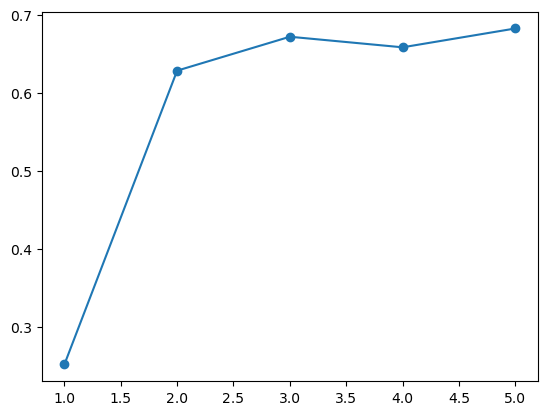

In [38]:
plt.plot([1,2,3,4,5], np.mean(val_lls_reshape, axis=1), '-o')

In [ ]:
# Todo:
# Stored the res_params
# make init = 1
# store Train_ll if possible